
#### Data dictionary:

* **survived** - Survival (0 = No; 1 = Yes)
* **pclass** - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* **name** - Name
* **sex** - Sex
* **age** - Age
* **sibsp** - Number of Siblings/Spouses aboard
* **parch** - Number of Parents/Children aboard
* **ticket** - Ticket Number
* **fare** - Passenger Fare
* **cabin** - Cabin
* **embarked** - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data through pandas: 

In [2]:
titanic=pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Size of the data:

In [3]:
titanic.shape

(891, 11)

Checking for data types and integrity of the data: 

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


From the above chart, some null values can be  identified in the `age`, `cabin`, and `embarked`. We'll examine them further later on

Descriptive statistics:

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing data:

In [6]:
missing=titanic.isnull().sum().sort_values(ascending=False)
percent_missing = round(titanic.isnull().sum()/titanic.isnull().count()*100,  2).sort_values()
missing_df=pd.concat([missing,  percent_missing],axis=1, keys=['Missing points','%'])
missing_df.head()

,Missing points,%
cabin,687,77.10
age,177,19.87
embarked,2,0.22
fare,0,0.00
ticket,0,0.00


There are 3 categories of data that have missing points.
* `Cabin` has the largest amount of null values (77%),which might lead us to either examine it further or just drop it since there are a lot of missing data within that feature
* `age`has almost 20% of null values, and since it is a numerical feature that approaches a normal distribution, we'll see if we can impute the missing data with the measures of central tendency (mean, median or mode) or drop some observations.
* `embarked`has only 2 null values, which can be easily filled with the most occurrying value.

### Exploratory Data Analysis

Distribution of the `sex` of the passengers within the dataset :

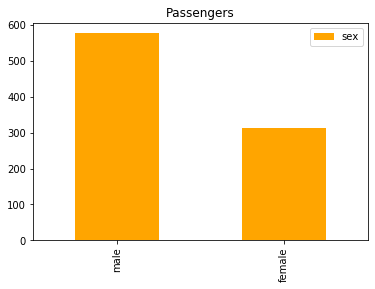

In [7]:
ax=titanic.sex.value_counts().plot(kind='bar',color='orange')
xlabels=[20,30]
plt.legend()
plt.title('Passengers')
#ax.set_yticklabels(xlabels)
plt.show()

Percentage of people that `survived` the Titanic according to this dataset:

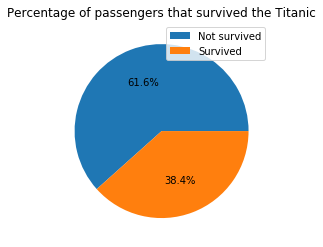

In [8]:
plt.pie(titanic.survived.value_counts(),autopct='%1.1f%%');
labels=['Not survived','Survived']
plt.legend(labels,loc=1)
plt.title('Percentage of passengers that survived the Titanic')
plt.show()

Men and Women that survived the Titanic:

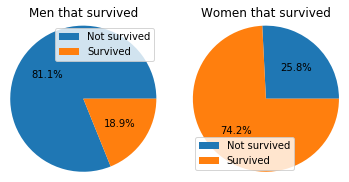

In [9]:

data_male=titanic[titanic.sex=='male'].survived.value_counts()
data_female=titanic[titanic.sex=='female'].survived.value_counts().sort_index()

fig,(ax1,ax2)=plt.subplots(1,2)

ax1.pie(data_male,radius=1.2,autopct='%1.1f%%')
ax1.set_title('Men that survived')
ax1.legend(['Not survived','Survived'],loc=0)

ax2.pie(data_female,radius=1.2,autopct='%1.1f%%')
ax2.set_title('Women that survived')
ax2.legend(['Not survived','Survived'],loc=0)

plt.show()

Distribution of the data of Men and Women that both survived and not survived:

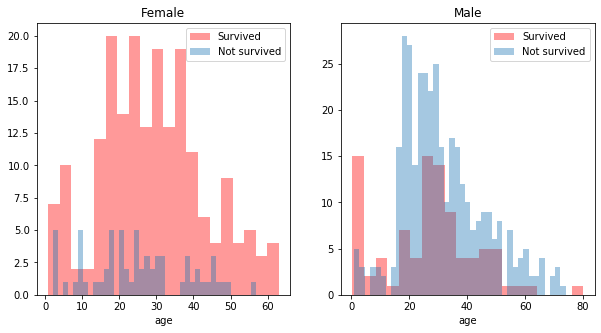

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=20, label = 'Survived', ax = axes[0], kde =False,color='r')
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = 'Not survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=20, label = 'Survived', ax = axes[1], kde = False,color='r')
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = 'Not survived', ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')
plt.show()

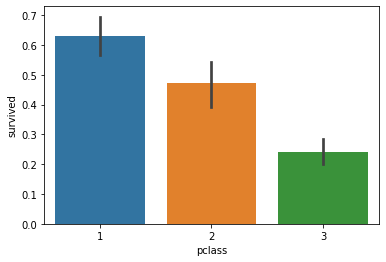

In [11]:
sns.barplot(x='pclass', y='survived', data=titanic);

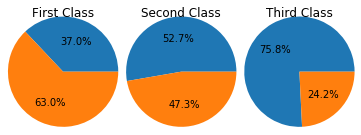

Legend:
Orange:Survived
Blue:Not survived


In [12]:
#male:
data_1=titanic[titanic.pclass==1].survived.value_counts().sort_index()
data_2=titanic[titanic.pclass==2].survived.value_counts()
data_3=titanic[titanic.pclass==3].survived.value_counts()

fig,(ax1,ax2,ax3)=plt.subplots(1,3)

ax1.pie(data_1,radius=1.4,autopct='%1.1f%%')
ax1.set_title('First Class')
#ax1.legend(['Not survived','Survived'],loc=0)

ax2.pie(data_2,radius=1.4,autopct='%1.1f%%')
ax2.set_title('Second Class')
#ax2.legend(['Not survived','Survived'],loc=5)


ax3.pie(data_3,radius=1.4,autopct='%1.1f%%')
ax3.set_title('Third Class')
#ax3.legend(['Not survived','Survived'],loc=10)

plt.show()

print('Legend:')
print('Orange:Survived')
print('Blue:Not survived')

Survived =0 -> Not survived
Survived=1 -> Survived


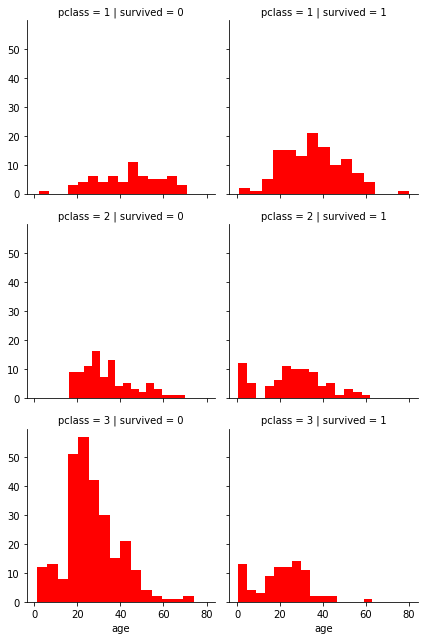

In [13]:
g = sns.FacetGrid(titanic, col="survived",  row="pclass")
g = g.map(plt.hist, "age",alpha=1,bins=15,color='r')
print('Survived =0 -> Not survived')
print('Survived=1 -> Survived')

Legend:
Orange:Survived
Blue:Not survived


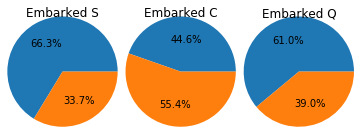

In [14]:
#male:
data_1=titanic[titanic.embarked=='S'].survived.value_counts()
data_2=titanic[titanic.embarked=='C'].survived.value_counts().sort_index()
data_3=titanic[titanic.embarked=='Q'].survived.value_counts()

fig,(ax1,ax2,ax3)=plt.subplots(1,3)

ax1.pie(data_1,radius=1.4,autopct='%1.1f%%')
ax1.set_title('Embarked S')
#ax1.legend(['Not survived','Survived'],loc=0)

ax2.pie(data_2,radius=1.4,autopct='%1.1f%%')
ax2.set_title('Embarked C')
#ax2.legend(['Not survived','Survived'],loc=5)


ax3.pie(data_3,radius=1.4,autopct='%1.1f%%')
ax3.set_title('Embarked Q')
#ax3.legend(['Not survived','Survived'],loc=10)

print('Legend:')
print('Orange:Survived')
print('Blue:Not survived')
plt.show()

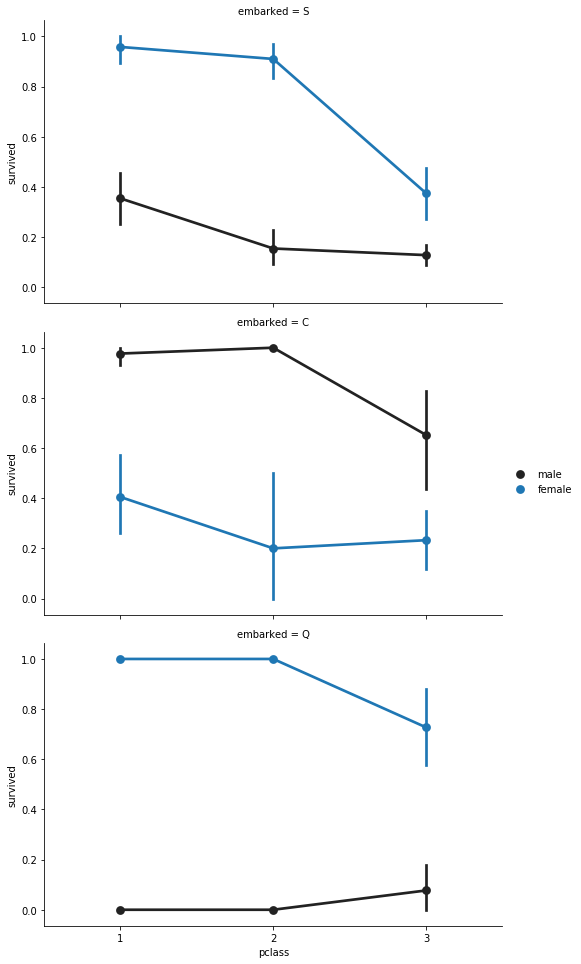

In [15]:
FacetGrid = sns.FacetGrid(titanic, row='embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [16]:
#plt.figure(0)
#plt.pie(titanic[titanic.sex=='male'].survived.value_counts(),autopct='%1.1f%%')
#labels=['Not survived','Survived']
#plt.legend(labels,loc=1)
#plt.title('Percentage of male passengers that survived the Titanic')

#plt.figure(1)
#plt.pie(titanic[titanic.sex=='female'].survived.value_counts(),autopct='%1.1f%%')
#plt.show
#plt.legend(labels,loc=1)
#plt.title('Percentage of male passengers that survived the Titanic')

C:\Users\Usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Usuario\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


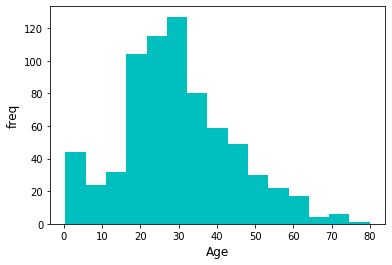

In [17]:
plt.hist(titanic['age'],color='c',bins=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('freq',fontsize=12)
plt.show()

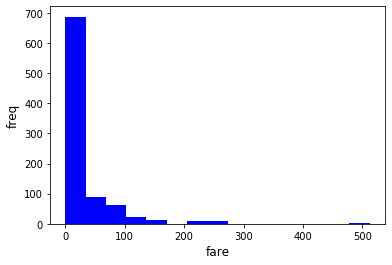

In [18]:
plt.hist(titanic.fare,color='b',bins=15)
plt.xlabel('fare',fontsize=12)
plt.ylabel('freq',fontsize=12)
plt.show()

### Data preprocessing:

#### Missing data:

#### `Embarked` :

We'll first apporach the `embarked` column. Since it only has 2 missing values, we'll fill it in with the most ocurring value:

In [28]:
titanic.embarked.describe()

count     889
unique      3
top         S
freq      644
Name: embarked, dtype: object

In [29]:
titanic.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
#The most ocurrying 'embarked' place is : 'S' (Southampton)
titanic['embarked']=titanic['embarked'].fillna('S')

In [35]:
#Checking for absence of null values in 'embarked':
titanic.embarked.isnull().sum()

0

#### `Age` :

In [53]:
titanic_df=titanic.copy()

titanic_df['age'].isnull().sum()

177

In [ ]:
median=titanic['age'].median()

Filling with the median:

In [58]:
titanic_df['age']=titanic_df['age'].fillna(median)